# Content:

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

1. ID: ID Number of Customers.
2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.
3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product: Cost of the Product in US Dollars.
7. Prior purchases: The Number of Prior Purchase.
8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.
9. Gender: Male and Female.
10. Discount offered: Discount offered on that specific product.
11. Weight in gms: It is the weight in grams.
12. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates
it has reached on time.

# Imports

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the shipping data

In [3]:
shipping_data = pd.read_csv("C:/Users/keshi/Downloads/archive (1)/shipping.csv")

In [4]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
shipping_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Explore the data

In [8]:
shipping_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [9]:
shipping_data.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

# Null Values in data

In [10]:
shipping_data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [11]:
# The data does not include any null value

<Axes: xlabel='Mode_of_Shipment', ylabel='count'>

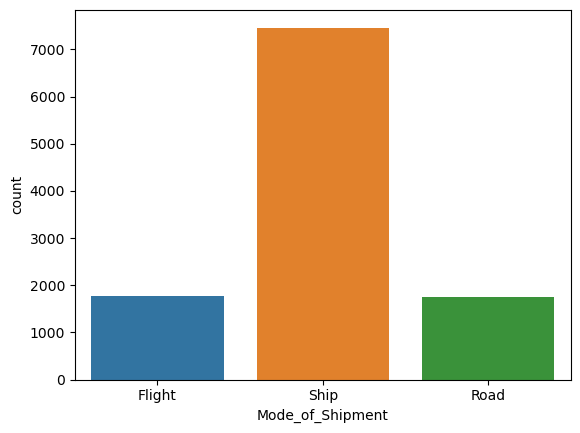

In [14]:
# We would use countplot to analysis the occurance of the mode_of shipment
sns.countplot(shipping_data, x='Mode_of_Shipment')

We can predict that large quantity of goods are shipped by sea due to long distance

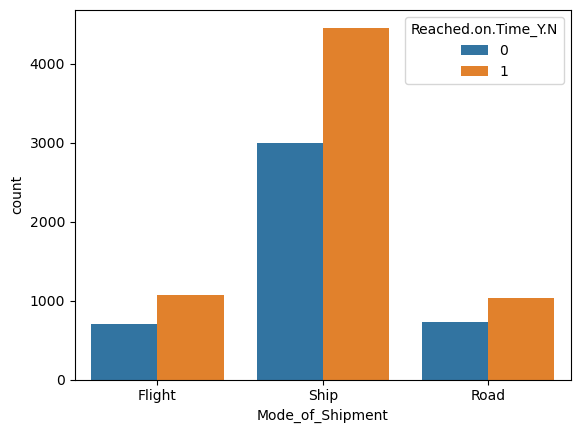

In [22]:
# using countplot to display the mode of shipment that reached on time to its destination.
sns.countplot(x='Mode_of_Shipment', hue ='Reached.on.Time_Y.N', data = shipping_data)
plt.title = ('Mode of Shipment VS reached on time')
plt.show()

Based on graph we can conclude that air flight is shipping faster than ship and road. While analysiing we will have to 
keep in mind that shipping via ship or road can affect Circumstances like weather, transportation issues, or customs 
delays can sometimes affect delivery times

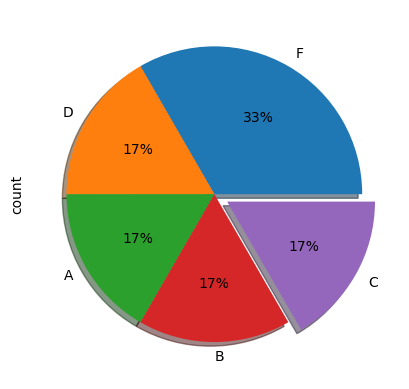

In [28]:
#exploring warehouse distribution
shipping_data['Warehouse_block'].value_counts().plot.pie(explode=(0,0,0,0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

Based on pie chart we can conclude that F distribution has optimizing efficiency and accessibility, this strategy enhances 
the movement of goods, minimizes picking and packing durations, and elevates the overall performance of warehouse operations.

TypeError: 'str' object is not callable

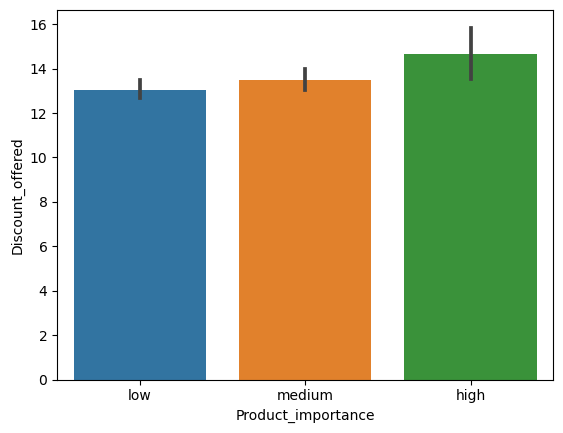

In [32]:
# we will explore products_importances vs discount offered to check the pricing strategy.
sns.barplot(x = 'Product_importance',y = 'Discount_offered',data = shipping_data)
plt.title('Discount_offered VS Product_importance')
plt.show()

In [33]:
#offering shipping costs discounts on high importance product will encourage customers to buy products 

<Axes: xlabel='Mode_of_Shipment', ylabel='Customer_rating'>

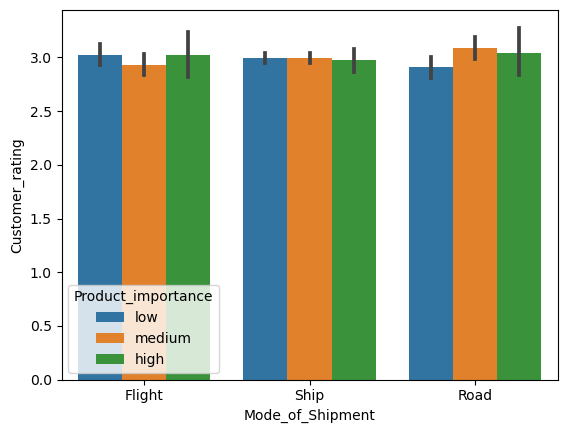

In [34]:
sns.barplot(x = 'Mode_of_Shipment', y = 'Customer_rating', hue = 'Product_importance', data = shipping_data)

Medium products appears to have high customer rating via road. Products with high customer ratings are often considered 
#important for maintaining a positive reputation and customer loyalty.

TypeError: 'str' object is not callable

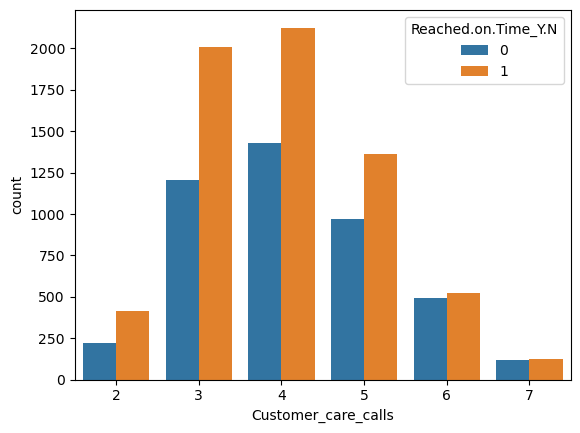

In [37]:
sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = shipping_data)
plt.title('Customer_care_calls VS item reached on time')
plt.show()

Products that are delayed has higher calls volume 

In [38]:
shipping_data['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

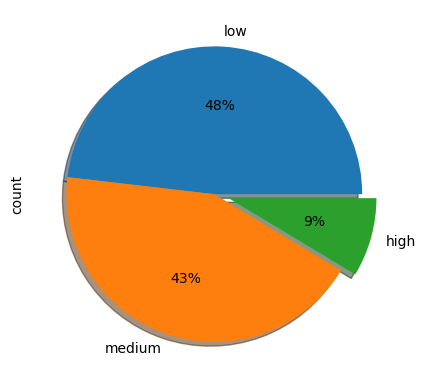

In [39]:
shipping_data['Product_importance'].value_counts().plot.pie(explode=(0,0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

high importance products has lower rate

TypeError: 'str' object is not callable

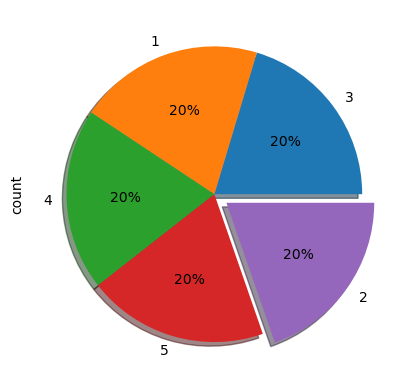

In [41]:

shipping_data['Customer_rating'].value_counts().plot.pie(explode=(0,0,0,0,0.1),autopct="%.0f%%",shadow=True)
plt.title('Customer_rating')
plt.show()

Count of each customer rating is 20%

TypeError: 'str' object is not callable

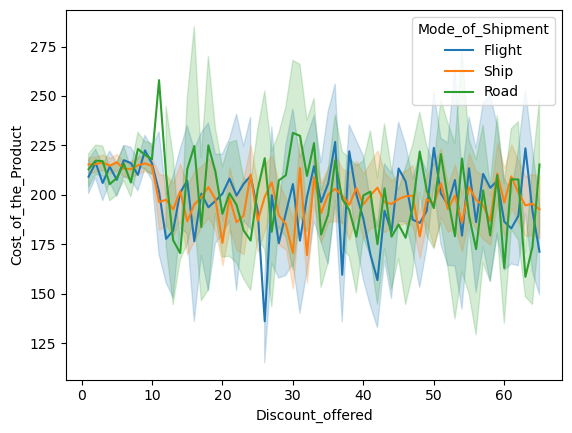

In [45]:
sns.lineplot(x='Discount_offered', y='Cost_of_the_Product', hue='Mode_of_Shipment', data=shipping_data)
plt.title('Discount_offered VS Cost_of_the_Product with Mode_of_Shipment ')
plt.show()

Certain shipping methods may incur higher costs due to factors like expedited service, insurance, or special handling needs.
Consequently, businesses might transfer these extra expenses to customers, influencing the final price of the product. 
Moreover, customers are often prepared to pay a premium for products with quicker delivery options, especially if discounts 
applied make the overall cost more accessible.

TypeError: 'str' object is not callable

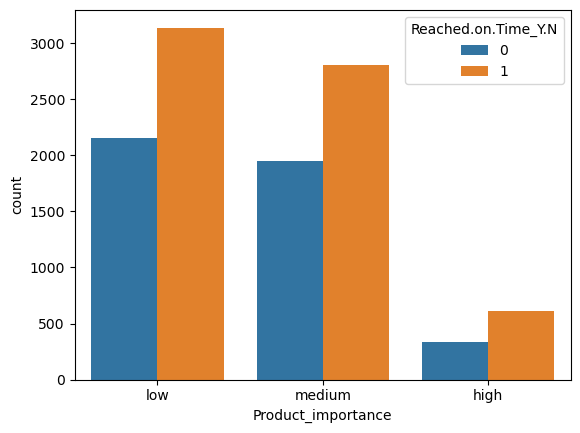

In [46]:
sns.countplot(x = 'Product_importance', hue = 'Reached.on.Time_Y.N', data = shipping_data)
plt.title('Product_importance VS reached on time ')
plt.show()

It seems that the instances of products not arriving on time(1) are more frequent than those arriving as scheduled.

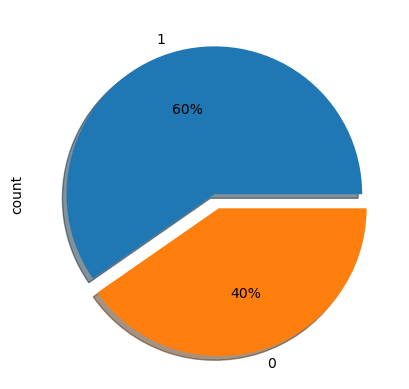

In [48]:
shipping_data['Reached.on.Time_Y.N'].value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

In [51]:
#Grouping data based on product_importance and mode of shipment to visualize unbalanced data
shipping_data.groupby(['Product_importance'])['Mode_of_Shipment'].count().reset_index()

,Product_importance,Mode_of_Shipment
0,high,948
1,low,5297
2,medium,4754


In [52]:
shipping_data.groupby(['Product_importance']).agg({'Discount_offered': 'value_counts',
                                        'Cost_of_the_Product': 'value_counts',
                                        'Prior_purchases': 'value_counts'}).reset_index()

,Product_importance,level_1,Discount_offered,Cost_of_the_Product,Prior_purchases
0,high,1,80.0,NaN,NaN
1,high,5,77.0,NaN,51.0
2,high,2,74.0,NaN,249.0
3,high,3,70.0,NaN,382.0
4,high,7,69.0,NaN,26.0
...,...,...,...,...,...
799,medium,118,NaN,1.0,NaN
800,medium,307,NaN,1.0,NaN
801,medium,97,NaN,1.0,NaN
802,medium,120,NaN,1.0,NaN


In [55]:
shipping_data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Save Data

In [63]:
shipping_data.to_csv('C:/Users/keshi/Downloads/archive (1)/Output_file/Shipping_cleaned_data.csv')